<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial7_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [莫凡Pytorch教程（七）：Pytorch搭建CNN网络对MNIST手写数字数据集进行分类](https://juejin.cn/post/7091470222258864135)


TensorBoard:
* [CoLab的PyTorch环境下使用TensorBoard实现可视化](https://zhuanlan.zhihu.com/p/136245396)
* [Getting Error 403 in Google Colab with Tensorboard with Firefox](https://stackoverflow.com/questions/64218755/getting-error-403-in-google-colab-with-tensorboard-with-firefox)

In [1]:
import torch
import torch.utils.data as Data
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

LR = 0.01
BATCH_SIZE = 50
EPOCH = 1
DOWNLOAD_MNIST = True #设置True后就自动下载，下载完成后改为False即可

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True,       # 设置True为训练数据，False为测试数据
    transform = torchvision.transforms.ToTensor(),   # 设置将下载的数据改变为tensor（0-1）的形式，原始数据是numpy array（0-255）的形式
    download=DOWNLOAD_MNIST  # 设置True后就自动下载，下载完成后改为False即可
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5, 1.0, '5')

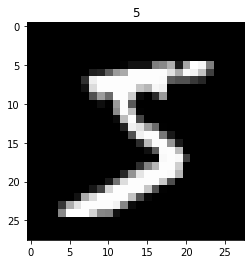

In [2]:
# plot one example
#print(train_data.train_data.size())                 # (60000, 28, 28)
#print(train_data.train_labels.size())               # (60000)
#plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
#plt.title('%i' % train_data.train_labels[0])
print(train_data.data.size())                 # (60000, 28, 28)
print(train_data.targets.size())               # (60000)
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title(f'{train_data.targets[0]}')

#plt.show()

In [3]:
train_loader = Data.DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

test_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=False,       # 设置True为训练数据，False为测试数据
)

# 只取前2000个数据进行测试
test_x = (torch.unsqueeze(test_data.data, dim=1)).float()[:2000]/255
test_y = test_data.targets[:2000]

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 使用nn.Sequential来搭建卷积层
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,      # 输入图像的通道数目
                out_channels = 16,    # 卷积核的高度（即卷积核的个数）
                kernel_size = 5,      # 卷积核的长宽为5*5
                stride = 1,           # 卷积核进行扫描时的跳度（移动的步长）
                padding = 2,          # 边缘的填充，
            ),                             # ->(16, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size = 2,           # ->(16, 14, 14)
            ),           
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),    # ->(32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2),               # ->(32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)           # (batch, 32, 7, 7)
        x = x.view(x.size(0), -1)   # (batch, 32*7*7)  展平
        output = self.out(x)
        return output, x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [17]:
#%matplotlib inline

from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')



<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0201 | test accuracy: 0.97


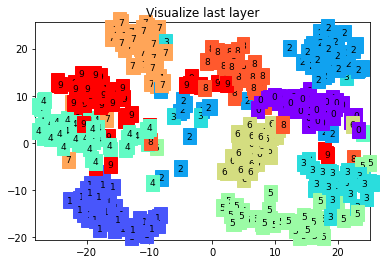

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.2569 | test accuracy: 0.97


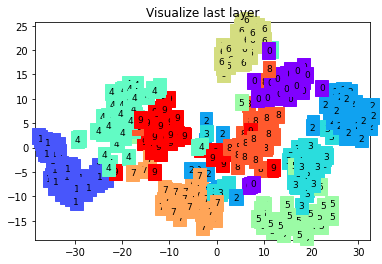

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0546 | test accuracy: 0.97


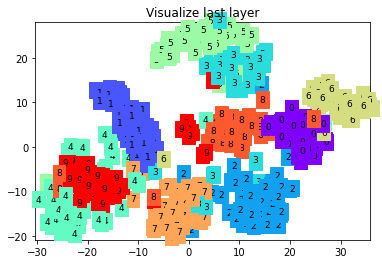

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0878 | test accuracy: 0.97


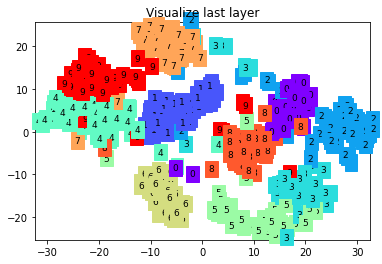

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0322 | test accuracy: 0.97


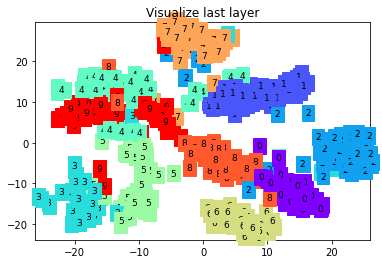

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0269 | test accuracy: 0.97


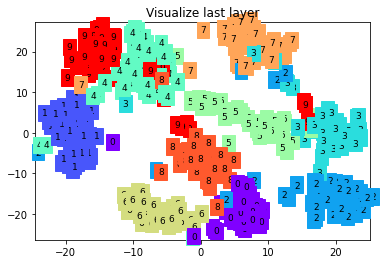

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0987 | test accuracy: 0.97


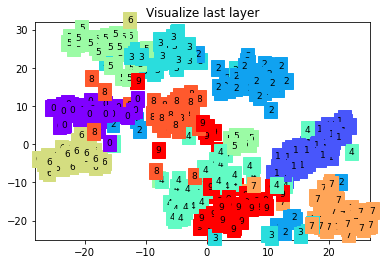

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0765 | test accuracy: 0.98


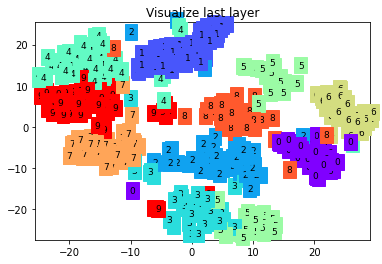

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0245 | test accuracy: 0.97


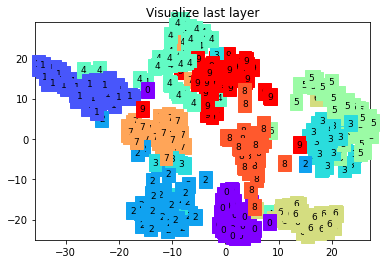

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0625 | test accuracy: 0.96


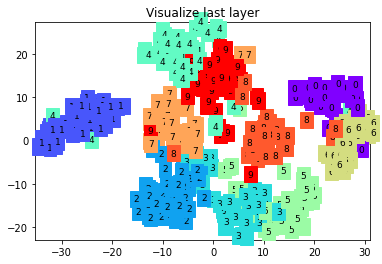

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.0037 | test accuracy: 0.97


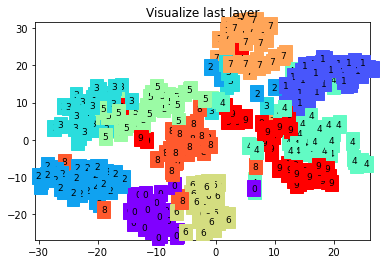

<class 'numpy.ndarray'> <class 'torch.Tensor'>
Epoch: 0 | train loss: 0.3913 | test accuracy: 0.98


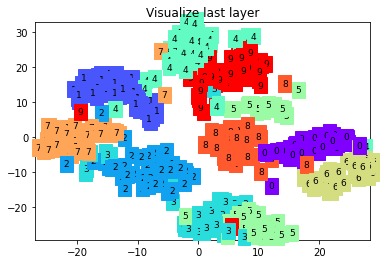

In [18]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
import plotly.express as px

try: 
    from sklearn.manifold import TSNE
    HAS_SK = True
except: 
    HAS_SK = False
    print('Please install sklearn for layer visualization')

def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9))
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title('Visualize last layer')
    plt.show() 
    plt.pause(0.01)


plt.ion()

# Disable FutureWarnings from tsne.fit_transform
import warnings
warnings.filterwarnings('ignore')

for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        output = cnn(batch_x)[0]
        loss = loss_func(output, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100== 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.argmax(test_output, 1).numpy()
            print(type(pred_y), type(test_y))
            accuracy = float((pred_y == test_y.numpy()).astype(int).sum()) / test_y.size(0)
            print(
                f'Epoch: {epoch}',
                f'| train loss: {loss.data:.4f}', 
                f'| test accuracy: {accuracy:.2f}'
            )

            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
                
plt.ioff()